## Creates a master file of all entries in proposed generator for EIA 860, 2004-2018

In [326]:
import pandas as pd
import json
import numpy as np

In [327]:
## Create dictionary of pandas dfs of proposed generators for each year

proposed_gen_dfs = {}
for year in range(2004,2019):
    proposed_df = pd.read_csv("../Data for Tax Equity Project/eia_data/eia860" + str(year) + 
                                  "/proposed_gen_" + str(year) + ".csv")
    proposed_df.columns = map(str.lower, proposed_df.columns)
    proposed_gen_dfs[year] = proposed_df
    
    ## Print out number of entries by year
    #print(str(year) + ": " + str(proposed_df.shape[0]))

# Merge DataFrames 
### This step consists of standardizing column names, because variable names change year to year, then merging
### 1. Standardize

In [329]:
## Create dictionary of column names in the list of dataframes (proposed_gen_dfs)
## Key = year
## Value = list of column names
all_cols = {}
for x in proposed_gen_dfs:
    all_cols[x] = (proposed_gen_dfs[x].columns)
unique_cols = [y for x in all_cols.values() for y in x]
print(np.unique(unique_cols))


['associated with combined heat and power system'
 'can bypass heat recovery steam generator?' 'carbon capture technology'
 'carbon capture technology?' 'carboncapture' 'cofire fuels?'
 'cogenerator' 'county' 'current month' 'current year' 'current_month'
 'current_year' 'duct burners' 'duct_burners' 'effective month'
 'effective year' 'effective_month' 'effective_year' 'energy source 1'
 'energy source 2' 'energy source 3' 'energy source 4' 'energy source 5'
 'energy source 6' 'energy_source_1' 'energy_source_2' 'energy_source_3'
 'energy_source_4' 'energy_source_5' 'energy_source_6'
 'fluidized bed technology' 'fluidized bed technology?' 'fluidized_bed'
 'gencode' 'generator id' 'generator_id' 'multiple fuels'
 'multiple fuels?' 'multiple_fuels' 'nameplate' 'nameplate capacity (mw)'
 'nameplate power factor' 'operating_switch' 'org_month' 'org_year'
 'other combustion technology?' 'owner' 'ownership' 'plant code'
 'plant name' 'plant_code' 'plant_name' 'plntcode' 'plntname'
 'previou

In [330]:
## Function to check whether col names in df_dict are in the newColDict
def check_cols_in_colDict(key, df_dict, newColDict):
    newColValues =  [y for x in newColDict.values() for y in x]
    tempList = [x in newColValues for x in df_dict[key]]
    return(np.array(df_dict[key])[[not x for x in tempList]])

In [331]:
## Code for reading in a dictionary and check whether all columns in df are in the dictionary
dict_file = '../Data for Tax Equity Project/eia_data/eia_master_files/proposed_gen_columns_dict.json'

with open(dict_file) as json_file:
    col_dict = json.load(json_file)
    
missing_cols = []
for x in all_cols:
    missing_cols.append([x for x in check_cols_in_colDict(x,all_cols,col_dict)])
missing_cols = [y for x in missing_cols for y in x]

## only energy source/startup source not yet coded
print(np.unique(missing_cols))

['energy source 1' 'energy source 2' 'energy source 3' 'energy source 4'
 'energy source 5' 'energy source 6' 'energy_source_1' 'energy_source_2'
 'energy_source_3' 'energy_source_4' 'energy_source_5' 'energy_source_6'
 'org_month' 'org_year' 'owner' 'proposed_cogenerator'
 'proposed_distgenerator' 'proposed_energy_source_1'
 'proposed_energy_source_2' 'proposed_energy_source_3'
 'proposed_energy_source_4' 'proposed_energy_source_5'
 'proposed_energy_source_6' 'proposed_nameplate' 'proposed_sfg_system'
 'proposed_status' 'proposed_summer_capability'
 'proposed_transportation_1a' 'proposed_transportation_1b'
 'proposed_transportation_1c' 'proposed_transportation_2a'
 'proposed_transportation_2b' 'proposed_transportation_2c'
 'proposed_turbines' 'proposed_winter_capability' 'startup source 1'
 'startup source 2' 'startup source 3' 'startup source 4'
 'startup_source_1' 'startup_source_2' 'startup_source_3'
 'startup_source_4' 'unnamed: 0']


### 2. Merge

## Columns to be converted

In [288]:
status_codes = {}
#IP: Planned new generator cancelled, indefinitely postponed, or no longer in resource plan
status_codes['cancelled'] = 'IP'
#TS: Construction complete, but not yet in commercial operation
status_codes['complete_not_operating'] = 'TS'
#P: Planned for installation but regulatory approvals not initiated; not under construction
status_codes['planned_not_started'] = 'P'
#L: Regulatory approvals pending; not under construction but site preparation could be underway
status_codes['reg_approval_pending'] = 'L'
#T: Regulatory approvals received; but not under construction but site preparation could be underway
status_codes['reg_approval_received'] = 'T'
#U: Under construction, less than or equal to 50 percent complete (based on construction time to date of operation)
status_codes['under_construction'] = 'U' 
#V: Under construction, more than 50 percent complete (based on construction time to date of operation)
status_codes['almost_done'] = 'V'
# Other (described in Comments)
status_codes['other'] = 'OT'


In [290]:
prime_mover_codes = {}
# ST	Steam Turbine, including nuclear, geothermal and solar steam  (does not include combined cycle) 
# GT	Combustion (Gas) Turbine (includes jet engine design)
# IC	Internal Combustion Engine (diesel, piston)  
# CA	Combined Cycle Steam Part 
# CT	Combined Cycle Combustion Turbine Part 
# CS	Combined Cycle Single Shaft (combustion turbine and steam turbine share a single generator)
# CC	Combined Cycle - Total Unit
# HY	Hydraulic Turbine (includes turbines associated with delivery of water by pipeline)
# PS	Hydraulic Turbine – Reversible (pumped storage)
# BT	Turbines used in a binary cycle such as geothermal
# PV	Photovoltaic
# WT	Wind Turbine
# CE	Compressed Air Energy Storage
# FC	Fuel Cell 
# OT	Other
# NA	Unknown at this time (use only for plants/generators in planning stage)

### Table to make: is average capacity addition by year

In [291]:
def makeCapacitySeries(df):
    capVar = [i for i in df.columns if "nameplate" in i][0]
    capList = pd.to_numeric(df[capVar])
    return(capList)

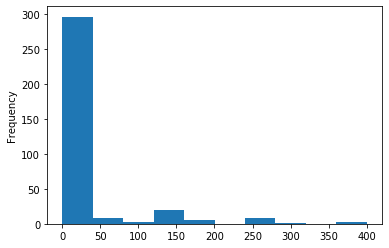

In [292]:
makeCapacitySeries(makeGenOfTypeDF(2012)).plot.hist()

In [293]:
for x in proposed_gen_dfs:
    print(str(x) + " : " + str(calc_mean_capacity(proposed_gen_dfs[x]).describe()))

NameError: name 'calc_mean_capacity' is not defined

In [118]:
grant_recipients = pd.read_excel("../Data for Tax Equity Project/treasury_data/grant_awards.xlsx", header=1)
solar_grants = grant_recipients[[("Solar" in str(i)) for i in grant_recipients['Technology']]]

In [124]:
solar_grants

,Business Name,State,Technology,Funded,Award Date
3,Alaska Airlines Inc.,AK,Solar Electricity,19238.0,2012-07-10 00:00:00
4,Ron Levy Photography,AK,Solar Electricity,4010.0,2012-04-11 00:00:00
10,Atlantic Windshield Repair Inc,AL,Solar Electricity,8270.0,2012-12-17 00:00:00
11,BBVA Compass,AL,Solar Electricity,24000.0,2011-10-12 00:00:00
12,Classic Car,AL,Solar Electricity,45058.0,2012-12-17 00:00:00
...,...,...,...,...,...
9991,Silverthorn Properties LLC,WI,Solar Thermal,4065.0,2010-10-22 00:00:00
9992,Traveling Hunter Investments LLC,WI,Solar Thermal,8294.0,2010-08-25 00:00:00
10004,"Sentry Security Systems, LLC",WV,Solar Electricity,480.0,2012-03-23 00:00:00
10005,"B. Taylor Triea, LLC",WV,Solar Thermal,4977.0,2012-05-16 00:00:00


In [1]:
## make data frame for all generators planned before 2008 and after